In [205]:
from plasma_classes import *
from plasma_utils import *
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [206]:
L = 1e-5
N_x = 1000
N_p = 3
h = L/N_x
tau = 1e-14

In [207]:
n0 = 1e17
n1 = n0*N_x/N_p
q = 1.60217e-19
m = 9.1093837e-31
epsilon = 8.85e-12

In [208]:
nodes = Nodes(N_x)

In [209]:
particles = Particles(N_p, n1, -q, m)
particles.x[0] = 3*L/4+h/3
particles.x[1] = L/4+h/2
particles.x[2] = L/3+h/2
particles.normalise(h, tau)

In [210]:
grid = np.linspace(0, L, N_x + 1)

In [211]:
get_rho(nodes, particles, periodic=True)

Text(0.5, 1.0, 'rho(x)')

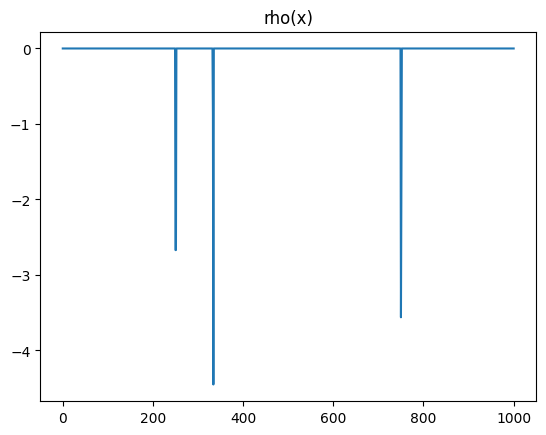

In [212]:
plt.plot(nodes.rho)
plt.title("rho(x)")

In [213]:
calc_fields(nodes, h, epsilon, periodic=True)

Text(0.5, 1.0, 'phi(x)')

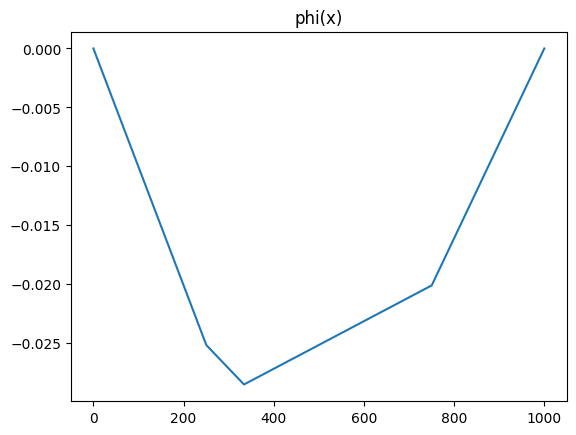

In [214]:
plt.plot(nodes.phi)
plt.title("phi(x)")

Text(0.5, 1.0, 'E(x)')

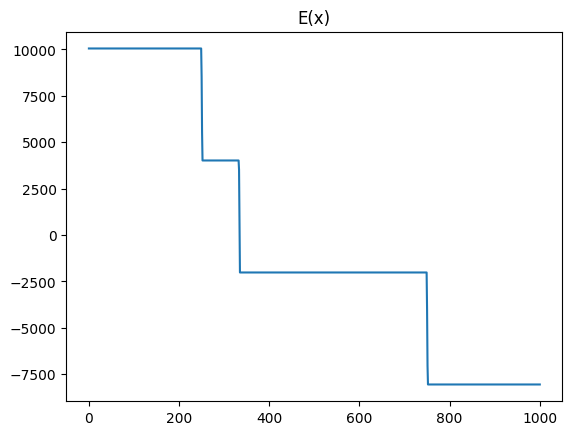

In [215]:
plt.plot(nodes.E)
plt.title("E(x)")

In [216]:
accel(particles, nodes, L, h, tau, zerostep=True)

In [217]:
particles.x[0]

750.3333333333334

In [218]:
particles.v[0]

-8.858837590522065e-06

In [219]:
n = 5000

In [220]:
def calc_kinetic_energy(particles: Particles, h: float, tau: float):
    if particles.normalised:
        particles.denormalise(h, tau)
    res = np.sum(particles.v**2)*particles.m*particles.concentration/2
    particles.normalise(h, tau)
    return res

In [221]:
def calc_electric_energy(particles: Particles, nodes: Nodes, h: float):
    res = 0
    rho = particles.q*particles.concentration
    for i in range(particles.n_macro):
        x = particles.x[i]
        phi = weight_field_value(x, nodes.phi)
        res += rho*phi/2
    return res

In [222]:
kinetic_history = []
electric_history = []
summ_history = []

In [223]:
first_traj = []
second_traj = []
third_traj = []

In [224]:
rho_history = []
phi_history = []

In [225]:
history = []
for i in tqdm(range(n)):
    try:
        move(particles, nodes, consistency=True, mode="periodic")
    except:
        print(i)
        break
    get_rho(nodes, particles, periodic=True)
    rho_history.append(nodes.rho.copy())
    calc_fields(nodes, h, epsilon, periodic=True)
    phi_history.append(nodes.phi)
    accel(particles, nodes, L, h, tau)
    first_traj.append(particles.x[0])
    second_traj.append(particles.x[1])
    third_traj.append(particles.x[2])
    electric_history.append(calc_electric_energy(particles, nodes, h))
    kinetic_history.append(calc_kinetic_energy(particles, h, tau))
    history.append(particles.x.copy())

history = np.array(history)*h

100%|██████████| 5000/5000 [00:05<00:00, 967.62it/s] 


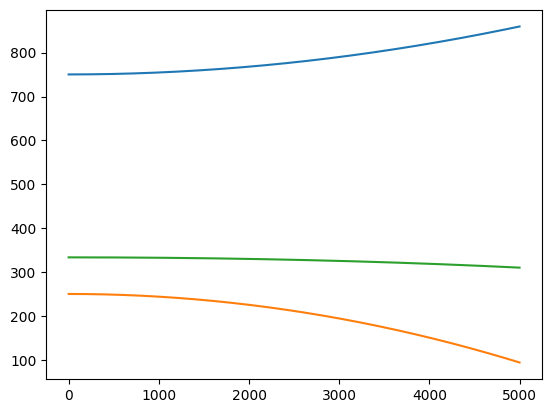

In [226]:
plt.plot(first_traj)
plt.plot(second_traj)
plt.plot(third_traj)

In [227]:
for i in range(n):
    summ_history.append(kinetic_history[i] + electric_history[i])

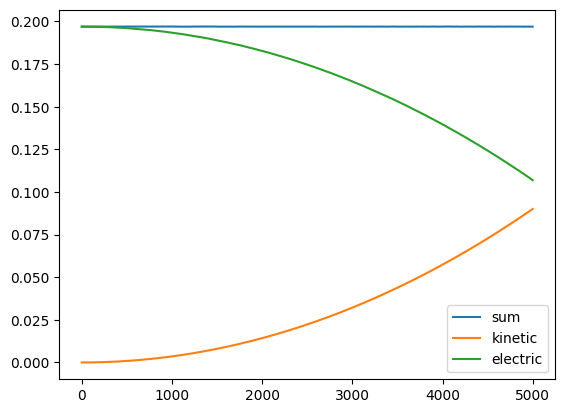

In [228]:
plt.plot(summ_history, label="sum")
plt.plot(kinetic_history, label="kinetic")
plt.plot(electric_history, label="electric")
plt.legend()
plt.show()

In [203]:
(np.max(electric_history)-np.min(electric_history))/(np.max(kinetic_history)-np.min(kinetic_history))

0.9996329722848761

In [204]:
import matplotlib.animation as animation

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

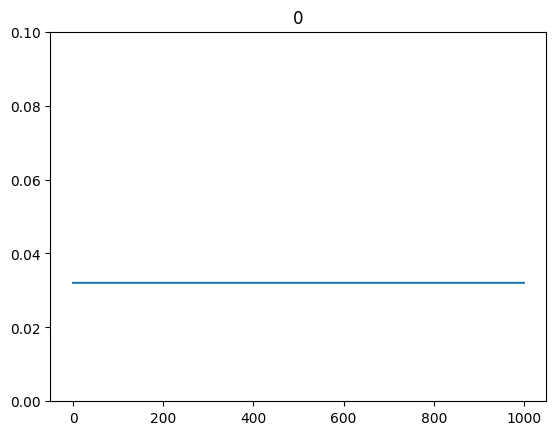

In [101]:
fig, ax = plt.subplots()

#  Создаем функцию, генерирующую картинки
#  для последующей "склейки":
def animate(i):
    ax.clear()
    line = ax.plot(rho_history[i*100])
    ax.set_title(str(i*100))
    ax.set_ylim(0, 0.1)
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=range(n),
                                      interval = 5,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('solo/rho_over_time.gif',
                 writer='imagemagick', 
                 fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: index 5000 is out of bounds for axis 0 with size 5000

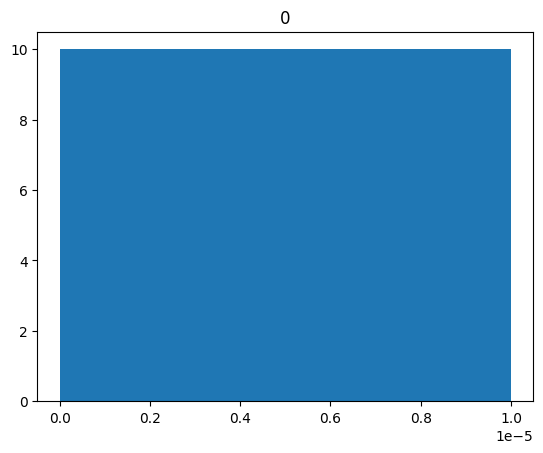

In [157]:
fig, ax = plt.subplots()

#  Создаем функцию, генерирующую картинки
#  для последующей "склейки":
def animate(i):
    ax.clear()
    line = ax.hist(history[i*10], bins=100)
    ax.set_title(str(i*10))
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=range(n),
                                      interval = 5,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('solo/distr_over_time.gif',
                 writer='imagemagick', 
                 fps=30)

In [64]:
fig, ax = plt.subplots()

#  Создаем функцию, генерирующую картинки
#  для последующей "склейки":
def animate(i):
    ax.clear()
    line = ax.plot(phi_history[i*100])
    ax.set_title(str(i*100))
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=range(n),
                                      interval = 5,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('solo/phi_over_time.gif',
                 writer='imagemagick', 
                 fps=30)

7.318000045368552e-10

In [65]:
n1

5e+18